## Training and prediction made on uniform data taken from 0 to 172 with 1460 data points

In [1]:
import pandas as pd
import numpy as np

try :
  %tensorflow_version 2.x
except :
  pass
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


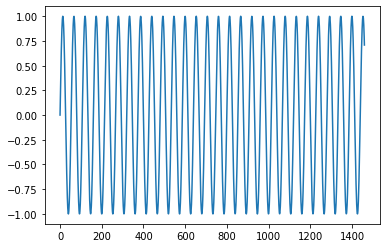

In [2]:
t = np.linspace(0, 172, 1460)
x = np.sin(t)
plt.plot(x)

In [3]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.49999875]
 [0.55880694]
 [0.61679878]
 ...
 [0.9269343 ]
 [0.89336203]
 [0.85432921]]


In [0]:
x = np.reshape(x, (-1, 1))

In [0]:
train = x[0:1200]
test = x[1200:]

In [5]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
'''
step = 10
trainX, trainY = createDataset(train, step)
testX, testY = createDataset(test, step)
print(trainX[0])'''

'\nstep = 10\ntrainX, trainY = createDataset(train, step)\ntestX, testY = createDataset(test, step)\nprint(trainX[0])'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(1024, return_sequences=True, activation="tanh"))
model.add(LSTM(1024, return_sequences=True, activation="tanh"))
model.add(LSTM(512, return_sequences=True, activation="tanh"))
model.add(LSTM(128, return_sequences=True, activation="tanh"))
model.add(LSTM(1, activation="tanh"))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=1)

In [0]:
pred = model.predict(testX)

In [0]:
df = pd.DataFrame(x[:1210])
p = pd.DataFrame(pred)
index = [i for i in range(len(x))]
p.index = index[1210:]

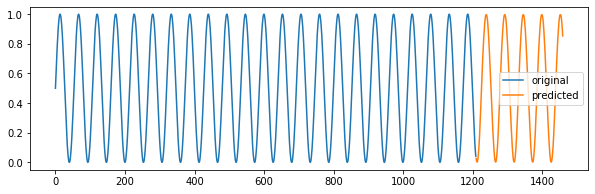

In [0]:
plt.figure(figsize=(10, 3))
plt.plot(df, label='original')
plt.plot(p, label='predicted')
plt.legend(loc="center right")

***

## Prediction on dataset of 5000 values

In [0]:
# import dataset here

from google.colab import files
files.upload()

Saving sinewave.csv to sinewave (1).csv


{'sinewave.csv': b'sinewave\n0.841470985\n0.873736397\n0.90255357\n0.927808777\n0.949402346\n0.967249058\n0.98127848\n0.991435244\n0.997679266\n0.999985904\n0.998346054\n0.992766189\n0.983268329\n0.969889958\n0.952683874\n0.931717983\n0.907075026\n0.878852258\n0.847161063\n0.812126509\n0.773886863\n0.73259304\n0.688408006\n0.64150614\n0.592072543\n0.540302306\n0.486399742\n0.430577581\n0.373056127\n0.314062391\n0.253829194\n0.192594249\n0.130599223\n0.068088781\n0.005309624\n-0.057490488\n-0.120063711\n-0.182163097\n-0.243543569\n-0.303962886\n-0.3631826\n-0.420968998\n-0.477094024\n-0.531336178\n-0.583481391\n-0.633323869\n-0.680666907\n-0.725323664\n-0.7671179\n-0.805884672\n-0.841470985\n-0.873736397\n-0.90255357\n-0.927808777\n-0.949402346\n-0.967249058\n-0.98127848\n-0.991435244\n-0.997679266\n-0.999985904\n-0.998346054\n-0.992766189\n-0.983268329\n-0.969889958\n-0.952683874\n-0.931717983\n-0.907075026\n-0.878852258\n-0.847161063\n-0.812126509\n-0.773886863\n-0.73259304\n-0.688408

In [0]:
x = pd.read_csv('sinewave.csv') # substitute 'sinewave.csv' with the name of your dataset

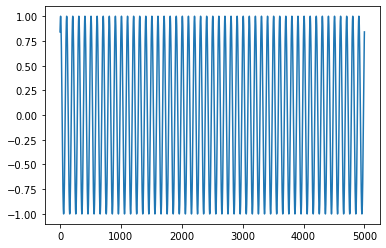

In [0]:
plt.plot(x)

In [0]:
x = np.asarray(x['sinewave'].values) # substitute 'sinewave' with name of the column in your dataset

In [0]:
# Normalizing data

x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
x

array([[0.92074142],
       [0.93687436],
       [0.95128315],
       ...,
       [0.88356436],
       [0.90294802],
       [0.92074142]])

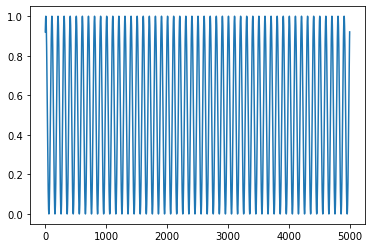

In [0]:
plt.plot(x)

In [0]:
x = np.reshape(x, (-1, 1))
x

array([[0.92074142],
       [0.93687436],
       [0.95128315],
       ...,
       [0.88356436],
       [0.90294802],
       [0.92074142]])

In [0]:
# Change values for testing and training size to your custom values

train = x[0:1200]
test = x[1200:]

In [0]:
step = 10 # change step value to your custom value
trainX, trainY = createDataset(train, step)
testX, testY = createDataset(test, step)
print(trainX[0])

[[0.92074142]
 [0.93687436]
 [0.95128315]
 [0.96391093]
 [0.97470786]
 [0.98363135]
 [0.99064616]
 [0.99572461]
 [0.99884666]
 [1.        ]]


In [0]:
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=1)

Train on 1190 samples
Epoch 1/100
1190/1190 [==============================] - 4s 4ms/sample - loss: 6.6870e-04
Epoch 2/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 2.7546e-04
Epoch 3/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 3.2006e-04
Epoch 4/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.6234e-04
Epoch 5/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.4116e-04
Epoch 6/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.4486e-04
Epoch 7/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.2323e-04
Epoch 8/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.3025e-04
Epoch 9/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.1772e-04
Epoch 10/100
1190/1190 [==============================] - 4s 3ms/sample - loss: 1.1813e-04
Epoch 11/100
1190/1190 [==============================] - 4s 3ms/sample - los

In [0]:
pred_on_dataset = model.predict(testX)

In [0]:
df = pd.DataFrame(x[:1210]) # change value here - '1210' to value of your choice
p = pd.DataFrame(pred_on_dataset)
index = [i for i in range(len(x))]
p.index = index[1210:] # change value here - '1210' to value of your choice

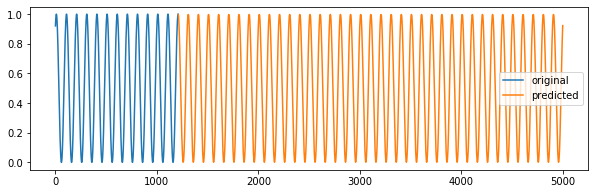

In [0]:
plt.figure(figsize=(10, 3))
plt.plot(df, label='original')
plt.plot(p, label='predicted')
plt.legend(loc="center right")

### Training with 1200 datapoints and predicting 260 future values

In [12]:
y = x[:1460]

train2 = y[:1200]
test2 = y[1200:]

xtrain, ytrain = createDataset(train2, 10)
xtest, ytest = createDataset(test2, 10)

model.fit(xtrain, ytrain, epochs=100)
pred2 = model.predict(xtest)

Train on 1190 samples
Epoch 1/100
1190/1190 [==============================] - 1s 619us/sample - loss: 1.0004e-04
Epoch 2/100
1190/1190 [==============================] - 1s 611us/sample - loss: 9.6721e-05
Epoch 3/100
1190/1190 [==============================] - 1s 608us/sample - loss: 1.1954e-04
Epoch 4/100
1190/1190 [==============================] - 1s 607us/sample - loss: 1.0218e-04
Epoch 5/100
1190/1190 [==============================] - 1s 614us/sample - loss: 1.1796e-04
Epoch 6/100
1190/1190 [==============================] - 1s 608us/sample - loss: 1.4854e-04
Epoch 7/100
1190/1190 [==============================] - 1s 609us/sample - loss: 6.7397e-05
Epoch 8/100
1190/1190 [==============================] - 1s 603us/sample - loss: 9.9582e-05
Epoch 9/100
1190/1190 [==============================] - 1s 607us/sample - loss: 1.2654e-04
Epoch 10/100
1190/1190 [==============================] - 1s 605us/sample - loss: 1.1523e-04
Epoch 11/100
1190/1190 [==============================] -

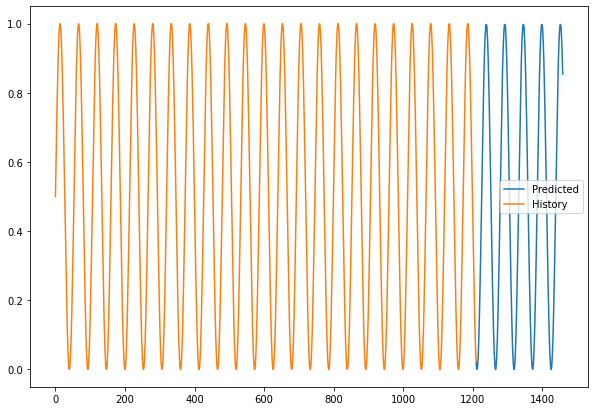

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(pd.DataFrame(pred2, index=[i for i in range(1210, 1460)]))
plt.plot(y[:1211])
plt.legend(['Predicted', 'History'])